In [200]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import seaborn as sns

In [201]:
##Read in training data##
data=pd.read_csv('task2v2_2021.training.csv')

##Selecting variables##
clf_yy=data['f19']
clf_xx=data.loc[:,data.columns!='f19']
clf_xx=pd.DataFrame(clf_xx)
clf_xx.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18
0,7.529802,10.894680,6.553497,6.923415,14.930583,2.530116,4.220858,9.025601,15.407324,14.603119,-15.158120,-7.094872,4.640659,1.273443,-4.051262,0.948738,-0.847754,-2.125903,15.068632
1,12.823096,5.578253,19.690308,4.020000,17.090560,2.085974,4.994230,7.615813,10.855320,8.114728,3.941237,-5.918346,9.671283,1.894124,2.470618,3.730390,1.188005,-4.946557,-3.752982
2,9.090970,13.806237,8.434557,14.634294,6.545695,0.539013,3.055159,30.595383,5.392238,20.741999,6.550153,-11.561728,6.958211,1.659702,-3.513182,1.486818,4.096951,-2.282141,5.110004
3,16.158741,4.974498,21.849790,18.935090,4.533273,2.011211,2.733962,12.922905,14.151981,15.106882,10.655511,2.309231,1.103660,1.902801,3.292724,8.292724,1.052099,-6.933780,-3.275866
4,8.656180,13.908097,8.785498,16.596993,3.167613,1.179834,5.364195,15.463137,11.127448,15.055472,16.248980,-2.565089,1.030829,0.671805,2.660125,7.660125,1.144769,-4.789034,10.555266


In [202]:
##Read in test data##
data2=pd.read_csv('task2v2_2021.test.csv')
data2=pd.DataFrame(data2)
data2.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18
0,12.507367,12.761036,16.837903,18.706323,1.095016,3.018755,0.294927,6.113124,12.628345,6.140172,11.994760,0.102052,4.102052,1.221880,2.707878,7.707878,0.276429,-8.176993,1.061147
1,12.966032,10.207471,13.523373,17.959068,2.721933,1.010093,3.988997,8.308192,13.191536,8.699489,2.447274,-4.610840,-9.308635,0.764797,-1.642698,3.357302,0.260622,-4.788172,7.121761
2,12.449774,11.887156,15.104689,1.638360,18.052493,2.728030,4.031982,15.055038,9.681667,21.981975,-6.260974,-1.825467,15.545268,3.090878,-2.630487,13.454390,0.762312,-7.744404,11.903398
3,15.453151,10.114265,16.251574,5.097159,15.054997,2.733605,0.911722,9.165405,11.037097,8.250346,-5.510907,4.398452,8.398452,0.763513,0.121628,5.121628,-1.395507,-3.629919,-9.864254
4,7.532234,11.395040,7.778197,14.332461,3.296652,2.879917,2.736774,9.037846,13.399060,9.871044,2.349913,11.943440,15.943440,0.173322,5.230579,10.230579,0.884411,-2.034186,6.755161


In [203]:
##Standardization##
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
whole=pd.concat([clf_xx,data2])
std_whole=std.fit_transform(whole)
std_whole=pd.DataFrame(std_whole)
std_whole.shape

(12000, 19)

In [204]:
training=std_whole.iloc[0:10000,:]
test=std_whole.iloc[10000:,:]
training.columns=['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
                  'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18']

test.columns=['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18']
test.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18
10000,-0.212074,0.826933,0.449793,1.619186,-1.905811,0.503616,-2.229861,-1.144161,0.768940,-1.587094,1.469845,0.439760,-0.131374,-0.294081,0.885355,0.891543,0.312747,-1.164825,0.113288
10001,-0.145350,-0.043272,-0.175078,1.469589,-1.582267,-1.424700,0.147983,-0.824451,0.960601,-1.099852,0.374069,-0.330242,-2.588802,-0.813153,-0.299129,-0.303580,0.304483,-0.121939,0.784857
10002,-0.220452,0.529131,0.123039,-1.797734,1.466505,0.224520,0.175652,0.158224,-0.233849,1.428862,-0.625386,0.124838,1.965527,1.828388,-0.568063,2.470136,0.566766,-1.031699,1.314704
10003,0.216458,-0.075035,0.339256,-1.105300,0.870396,0.229872,-1.832834,-0.699598,0.227420,-1.185360,-0.539300,1.141714,0.655916,-0.814611,0.181225,0.181089,-0.561338,0.234505,-1.097342
10004,-0.935821,0.361428,-1.258186,0.743561,-1.467974,0.370332,-0.658063,-0.718177,1.031224,-0.876812,0.362895,2.374430,2.038489,-1.484844,1.572183,1.584541,0.630599,0.725580,0.744234


In [205]:
##資料分割##
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [206]:
X_train,X_test,Y_train,Y_test=train_test_split(training,clf_yy,test_size=.3)
##Building models(rf)##
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1,n_estimators=150,criterion='entropy')

# Train the model using the training sets
forest_model.fit(X_train, Y_train)

# Make predictions using the testing set

melb_preds = forest_model.predict(X_test)
print(f1_score(Y_test,melb_preds,average='weighted'))

0.6176220740262687


In [191]:
X_train,X_test,Y_train,Y_test=train_test_split(training,clf_yy,test_size=.3)
##Building models(svm)##
from sklearn.svm import LinearSVC
svc = LinearSVC()

# Train the model using the training sets
svc.fit(X_train, Y_train)

# Make predictions using the testing set

svc_pred = svc.predict(X_test)
print(f1_score(Y_test,svc_pred,average='weighted'))

0.6240995628261212


C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [192]:
X_train,X_test,Y_train,Y_test=train_test_split(training,clf_yy,test_size=.3)
##Building models(knn)##
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

# Train the model using the training sets
knn.fit(X_train, Y_train)

# Make predictions using the testing set

knn_pred = knn.predict(X_test)
print(f1_score(Y_test,knn_pred,average='weighted'))

0.4786987344866173


In [193]:
X_train,X_test,Y_train,Y_test=train_test_split(training,clf_yy,test_size=.3)
##Building models(tree)##
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train, Y_train)

# Make predictions using the testing set

tree_pred = tree.predict(X_test)
print(f1_score(Y_test,tree_pred,average='weighted'))

0.5279319204209181


In [194]:
X_train,X_test,Y_train,Y_test=train_test_split(training,clf_yy,test_size=.3)
##Building models(LDA)##
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# Make predictions using the testing set

lda_pred = lda.predict(X_test)
print(f1_score(Y_test,lda_pred,average='weighted'))

#0.88#

0.8959122895282379


In [195]:
##-----------Selecting variables by plot------------##

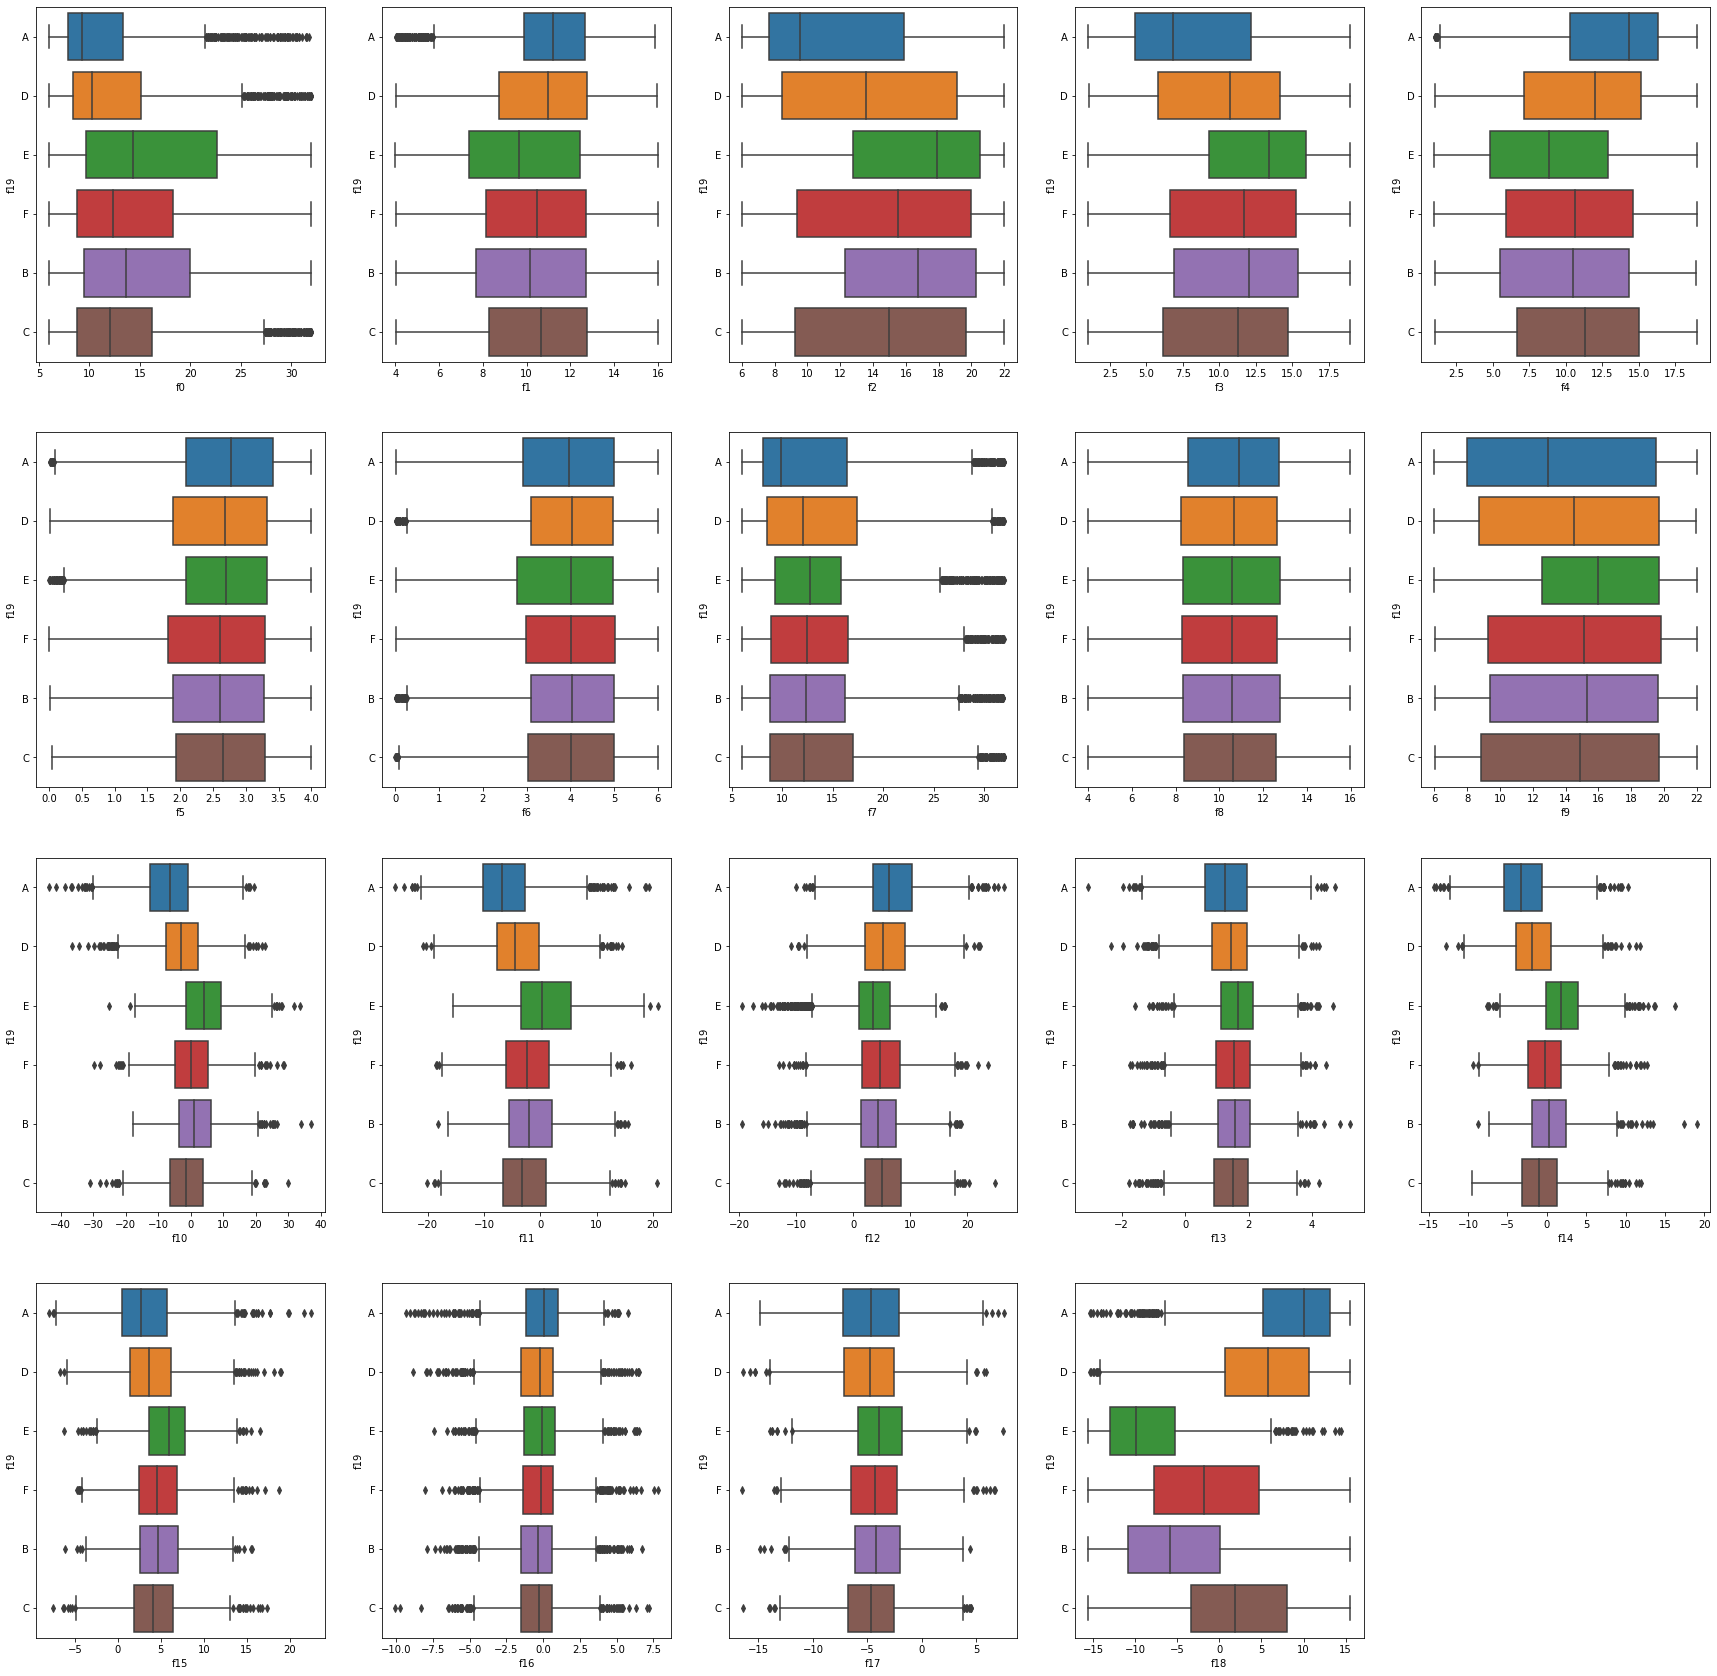

In [196]:
##Box plot##
fig=plt.figure(figsize=(30,30))
for inx, val in enumerate(clf_xx.columns):
    fig.add_subplot(4,5,inx+1)
    sns.boxplot(x=val,y=data['f19'],data=data)

In [197]:
##select garbage(by myself)##
col_drop_me=['f8','f13','f14']

##New training data##
clf_xx_me=training.drop(columns=col_drop_me)

##New test data##
test_me=test.drop(columns=col_drop_me)
test_me=test_me.to_numpy()

In [198]:
##Retraining##
X_train,X_test,Y_train,Y_test=train_test_split(clf_xx_me,clf_yy,test_size=.3)
##Building models(LDA)##
lda=LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# Make predictions using the testing set

lda_pred = lda.predict(X_test)
print(f1_score(Y_test,lda_pred,average='weighted'))

0.8940915744186603


In [199]:
##Rebuilding models(LDA)##
lda.fit(clf_xx_me, clf_yy)

# Make predictions using the testing set
lda_pred_me = lda.predict(test_me)

In [183]:
##Making output file##
lda_pred_me=list(lda_pred_me)
lda_pred_me[0:5]

dic_lda_me={'id':ID , 'Predicted':lda_pred_me}
output2=pd.DataFrame(dic_lda_me)
output2.to_csv('task2_dv8v13v14.csv',index=False)